In [2]:
# =========================================
# Multi-p CPD training & evaluation script
# =========================================
import os, re, random, math
import numpy as np
import pandas as pd
import torch, torch.nn as nn, torch.nn.functional as F, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
import os, time, json, shutil

In [3]:
print(os.listdir("/kaggle/input/cl31-3lakh-per-p-type2-nn-dataset/out_tpye_two_31"))

['bsc_p0.045_C1_n31_k11.csv', 'bsc_p0.025_C2_n31_k6.csv', 'bsc_p0.05_C1_n31_k11.csv', 'bsc_p0.03_C1_n31_k11.csv', 'bsc_p0.005_C2_n31_k6.csv', 'bsc_p0.07_C2_n31_k6.csv', 'bsc_p0.065_C1_n31_k11.csv', 'bsc_p0.02_C1_n31_k11.csv', 'bsc_p0.001_C2_n31_k6.csv', 'bsc_p0.095_C1_n31_k11.csv', 'bsc_p0.01_C2_n31_k6.csv', 'bsc_p0.04_C2_n31_k6.csv', 'bsc_p0.015_C2_n31_k6.csv', 'bsc_p0.055_C1_n31_k11.csv', 'bsc_p0.025_C1_n31_k11.csv', 'bsc_p0.085_C1_n31_k11.csv', 'bsc_p0.04_C1_n31_k11.csv', 'bsc_p0.035_C2_n31_k6.csv', 'bsc_p0.085_C2_n31_k6.csv', 'bsc_p0.06_C1_n31_k11.csv', 'bsc_p0.06_C2_n31_k6.csv', 'bsc_p0.001_C1_n31_k11.csv', 'bsc_p0.045_C2_n31_k6.csv', 'bsc_p0.065_C2_n31_k6.csv', 'bsc_p0.1_C1_n31_k11.csv', 'bsc_p0.015_C1_n31_k11.csv', 'bsc_p0.005_C1_n31_k11.csv', 'bsc_p0.035_C1_n31_k11.csv', 'bsc_p0.03_C2_n31_k6.csv', 'bsc_p0.09_C1_n31_k11.csv', 'bsc_p0.075_C2_n31_k6.csv', 'bsc_p0.05_C2_n31_k6.csv', 'bsc_p0.08_C2_n31_k6.csv', 'bsc_p0.02_C2_n31_k6.csv', 'bsc_p0.075_C1_n31_k11.csv', 'bsc_p0.095_C2_n3

Held-out p values (UNSEEN in training): [0.05, 0.095]
Seen p values (used for training):     [0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.1]
Unique p values found: [0.05, 0.095, 0.085, 0.07, 0.001, 0.09, 0.055, 0.01, 0.015, 0.045, 0.025, 0.035, 0.02, 0.1, 0.03, 0.075, 0.08, 0.04, 0.005, 0.065, 0.06]
Total unique p values: 21
Training samples: 330000
Validation samples: 33000
Test (seen-p) samples: 33000
Test (unseen-p) samples: 33000


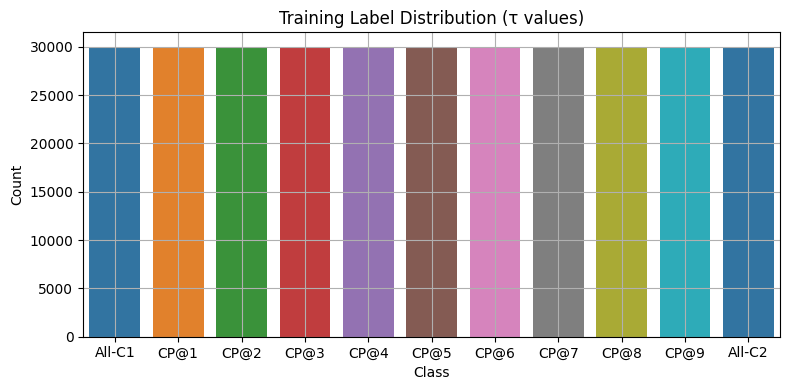

Training:   2%|▏         | 1/50 [00:28<23:07, 28.32s/it]

Epoch 01 | TrainLoss 2.3996 | ValAcc 0.0940


Training:   4%|▍         | 2/50 [00:56<22:43, 28.40s/it]

Epoch 02 | TrainLoss 2.2174 | ValAcc 0.3393


Training:   6%|▌         | 3/50 [01:25<22:13, 28.37s/it]

Epoch 03 | TrainLoss 1.4945 | ValAcc 0.5546


Training:   8%|▊         | 4/50 [01:53<21:42, 28.31s/it]

Epoch 04 | TrainLoss 1.1924 | ValAcc 0.6913


Training:  10%|█         | 5/50 [02:21<21:13, 28.31s/it]

Epoch 05 | TrainLoss 1.0029 | ValAcc 0.7573


Training:  12%|█▏        | 6/50 [02:50<20:48, 28.37s/it]

Epoch 06 | TrainLoss 0.8687 | ValAcc 0.7913


Training:  14%|█▍        | 7/50 [03:18<20:20, 28.39s/it]

Epoch 07 | TrainLoss 0.7776 | ValAcc 0.8116


Training:  16%|█▌        | 8/50 [03:47<19:53, 28.42s/it]

Epoch 08 | TrainLoss 0.7169 | ValAcc 0.8272


Training:  18%|█▊        | 9/50 [04:15<19:25, 28.42s/it]

Epoch 09 | TrainLoss 0.6718 | ValAcc 0.8393


Training:  20%|██        | 10/50 [04:43<18:56, 28.41s/it]

Epoch 10 | TrainLoss 0.6318 | ValAcc 0.8502


Training:  22%|██▏       | 11/50 [05:12<18:27, 28.40s/it]

Epoch 11 | TrainLoss 0.5977 | ValAcc 0.8602


Training:  24%|██▍       | 12/50 [05:40<17:56, 28.34s/it]

Epoch 12 | TrainLoss 0.5684 | ValAcc 0.8674


Training:  26%|██▌       | 13/50 [06:08<17:27, 28.31s/it]

Epoch 13 | TrainLoss 0.5408 | ValAcc 0.8750


Training:  28%|██▊       | 14/50 [06:36<16:58, 28.29s/it]

Epoch 14 | TrainLoss 0.5167 | ValAcc 0.8821


Training:  30%|███       | 15/50 [07:05<16:30, 28.30s/it]

Epoch 15 | TrainLoss 0.4928 | ValAcc 0.8871


Training:  32%|███▏      | 16/50 [07:33<16:01, 28.27s/it]

Epoch 16 | TrainLoss 0.4729 | ValAcc 0.8892


Training:  34%|███▍      | 17/50 [08:01<15:34, 28.33s/it]

Epoch 17 | TrainLoss 0.4552 | ValAcc 0.8918


Training:  36%|███▌      | 18/50 [08:30<15:06, 28.34s/it]

Epoch 18 | TrainLoss 0.4404 | ValAcc 0.8977


Training:  38%|███▊      | 19/50 [08:58<14:37, 28.31s/it]

Epoch 19 | TrainLoss 0.4260 | ValAcc 0.9008


Training:  40%|████      | 20/50 [09:26<14:08, 28.29s/it]

Epoch 20 | TrainLoss 0.4129 | ValAcc 0.9049


Training:  42%|████▏     | 21/50 [09:55<13:42, 28.36s/it]

Epoch 21 | TrainLoss 0.4000 | ValAcc 0.9081


Training:  44%|████▍     | 22/50 [10:23<13:14, 28.37s/it]

Epoch 22 | TrainLoss 0.3882 | ValAcc 0.9094


Training:  46%|████▌     | 23/50 [10:52<12:46, 28.39s/it]

Epoch 23 | TrainLoss 0.3779 | ValAcc 0.9123


Training:  48%|████▊     | 24/50 [11:20<12:18, 28.41s/it]

Epoch 24 | TrainLoss 0.3693 | ValAcc 0.9138


Training:  50%|█████     | 25/50 [11:48<11:48, 28.34s/it]

Epoch 25 | TrainLoss 0.3587 | ValAcc 0.9145


Training:  52%|█████▏    | 26/50 [12:17<11:20, 28.35s/it]

Epoch 26 | TrainLoss 0.3510 | ValAcc 0.9153


Training:  54%|█████▍    | 27/50 [12:45<10:51, 28.34s/it]

Epoch 27 | TrainLoss 0.3423 | ValAcc 0.9174


Training:  56%|█████▌    | 28/50 [13:13<10:23, 28.34s/it]

Epoch 28 | TrainLoss 0.3332 | ValAcc 0.9190


Training:  58%|█████▊    | 29/50 [13:41<09:53, 28.27s/it]

Epoch 29 | TrainLoss 0.3271 | ValAcc 0.9192


Training:  60%|██████    | 30/50 [14:10<09:25, 28.26s/it]

Epoch 30 | TrainLoss 0.3207 | ValAcc 0.9215


Training:  62%|██████▏   | 31/50 [14:38<08:55, 28.20s/it]

Epoch 31 | TrainLoss 0.3133 | ValAcc 0.9229


Training:  64%|██████▍   | 32/50 [15:06<08:27, 28.21s/it]

Epoch 32 | TrainLoss 0.3079 | ValAcc 0.9224


Training:  66%|██████▌   | 33/50 [15:34<07:59, 28.21s/it]

Epoch 33 | TrainLoss 0.3025 | ValAcc 0.9242


Training:  68%|██████▊   | 34/50 [16:02<07:30, 28.16s/it]

Epoch 34 | TrainLoss 0.2973 | ValAcc 0.9236


Training:  70%|███████   | 35/50 [16:30<07:02, 28.14s/it]

Epoch 35 | TrainLoss 0.2934 | ValAcc 0.9253


Training:  72%|███████▏  | 36/50 [16:58<06:33, 28.10s/it]

Epoch 36 | TrainLoss 0.2871 | ValAcc 0.9261


Training:  74%|███████▍  | 37/50 [17:26<06:05, 28.13s/it]

Epoch 37 | TrainLoss 0.2831 | ValAcc 0.9269


Training:  76%|███████▌  | 38/50 [17:55<05:37, 28.13s/it]

Epoch 38 | TrainLoss 0.2795 | ValAcc 0.9254


Training:  78%|███████▊  | 39/50 [18:23<05:10, 28.22s/it]

Epoch 39 | TrainLoss 0.2758 | ValAcc 0.9270


Training:  80%|████████  | 40/50 [18:51<04:41, 28.17s/it]

Epoch 40 | TrainLoss 0.2718 | ValAcc 0.9281


Training:  82%|████████▏ | 41/50 [19:19<04:13, 28.12s/it]

Epoch 41 | TrainLoss 0.2681 | ValAcc 0.9291


In [ ]:
# ---------------- Config -----------------
SEED = 0
T = 10
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 30000
SAMPLES_PER_CLASS_VAL   = int(0.10 * SAMPLES_PER_CLASS_TRAIN)
SAMPLES_PER_CLASS_TEST  = int(0.10 * SAMPLES_PER_CLASS_TRAIN)  # per split
BATCH_SIZE = 64
PATIENCE = 5
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# where your many-ps csvs live:
DATA_DIR = "/kaggle/input/cl31-3lakh-per-p-type2-nn-dataset/out_tpye_two_31"

# -------------- Reproducibility ----------
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# -------- Load all CSVs by (p, C) --------
# expect filenames like: bsc_p0.01_C1_n15_k11.csv  or  bsc_p0.07_C2_n15_k7.csv
rx = re.compile(r"bsc_p([0-9.]+)_C([12])_n31_k(11|6)\.csv$")
data = {}   # key: (p_float, "C1"/"C2") -> np.ndarray [n_codewords, FEATURE_SIZE]

for fn in os.listdir(DATA_DIR):
    m = rx.match(fn)
    if not m:
        continue
    p_val = float(m.group(1))
    C = "C" + m.group(2)
    arr = pd.read_csv(os.path.join(DATA_DIR, fn)).values
    data[(p_val, C)] = arr

# keep only p that have BOTH C1 and C2
ps_have_both = sorted({p for (p, C) in data.keys() if (p, "C1") in data and (p, "C2") in data})
assert len(ps_have_both) >= 4, "Need at least 4 different p to hold out 2 and still have variety."

# infer feature size
FEATURE_SIZE = next(iter(data.values())).shape[1]

# ---- choose two p values to hold out entirely ----
random.shuffle(ps_have_both)
HELDOUT_PS = sorted(ps_have_both[:2])           # unseen at train time
TRAIN_PS   = sorted(ps_have_both[2:])           # used for train/val
print("Held-out p values (UNSEEN in training):", HELDOUT_PS)
print("Seen p values (used for training):    ", TRAIN_PS)

print("Unique p values found:", ps_have_both)
print("Total unique p values:", len(ps_have_both))


# ------------- Data generator -------------
def _cycle(lst):
    while True:
        for x in lst:
            yield x

def generate_data_cpd_multi_ps(N_per_class, T, ps_pool, data_dict, balance=True):
    """
    Build sequences with same p across the whole sequence.
    For class 0 -> All-C1 (T from C1_p), class T -> All-C2 (T from C2_p),
    For class tau in 1..T-1 -> tau from C1_p then (T-tau) from C2_p, all at same p.
    If balance=True, allocate ~equal number of samples per p for each class.
    """
    X, y, p_of_sample = [], [], []
    ps_list = list(ps_pool)
    if balance:
        per_p = math.ceil(N_per_class / len(ps_list))
    g = _cycle(ps_list)

    for cls in range(NUM_CLASSES):
        made = 0
        while made < N_per_class:
            p = next(g)
            # draw indices
            C1_arr = data_dict[(p, "C1")]
            C2_arr = data_dict[(p, "C2")]
            if cls == 0:
                idx = np.random.choice(len(C1_arr), T, replace=True)
                sample = C1_arr[idx]
            elif cls == T:
                idx = np.random.choice(len(C2_arr), T, replace=True)
                sample = C2_arr[idx]
            else:
                tau = cls
                idx1 = np.random.choice(len(C1_arr), tau, replace=True)
                idx2 = np.random.choice(len(C2_arr), T - tau, replace=True)
                sample = np.vstack([C1_arr[idx1], C2_arr[idx2]])
            X.append(sample)
            y.append(cls)
            p_of_sample.append(p)
            made += 1
    return np.array(X), np.array(y), np.array(p_of_sample)

# ------------- Build splits ----------------
# train/val from TRAIN_PS, tests built separately
X_train, y_train, p_train = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TRAIN, T, TRAIN_PS, data, balance=True)
X_val,   y_val,   p_val   = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_VAL,   T, TRAIN_PS, data, balance=True)

# test on seen-p and unseen-p separately
X_test_seen,   y_test_seen,   p_test_seen   = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TEST, T, TRAIN_PS,   data, balance=True)
X_test_unseen, y_test_unseen, p_test_unseen = generate_data_cpd_multi_ps(SAMPLES_PER_CLASS_TEST, T, HELDOUT_PS, data, balance=True)


# >>> Insert the dataset size checks & bar plot here <<<
print("Training samples:", len(y_train))
print("Validation samples:", len(y_val))
print("Test (seen-p) samples:", len(y_test_seen))
print("Test (unseen-p) samples:", len(y_test_unseen))

plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(
    ticks=np.arange(NUM_CLASSES),
    labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"]
)
plt.grid(True)
plt.tight_layout()
plt.show()


# ---------- Build per-p views from the ACTUAL test sets ----------
def per_p_views(X, y, p_arr):
    views = {}
    for p in sorted(np.unique(p_arr)):
        mask = (p_arr == p)
        views[p] = (X[mask], y[mask])
    return views

per_p_tests_seen   = per_p_views(X_test_seen,   y_test_seen,   p_test_seen)
per_p_tests_unseen = per_p_views(X_test_unseen, y_test_unseen, p_test_unseen)

# merge seen + unseen so we can print a single table later
per_p_tests_all = {**per_p_tests_seen, **per_p_tests_unseen}

# --------- Dataset & Loaders --------------
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(ChangepointDataset(X_val,   y_val),   batch_size=BATCH_SIZE)
test_seen_loader   = DataLoader(ChangepointDataset(X_test_seen,   y_test_seen),   batch_size=BATCH_SIZE)
test_unseen_loader = DataLoader(ChangepointDataset(X_test_unseen, y_test_unseen), batch_size=BATCH_SIZE)

# --------------- Model --------------------
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size//2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size//2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels!=out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)
    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, 3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, 5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, 7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels*3)
    def forward(self, x):
        x1 = self.branch1(x); x2 = self.branch2(x); x3 = self.branch3(x)
        return F.relu(self.bn(torch.cat([x1,x2,x3], dim=1)))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)  # -> 96 ch
        if input_length <= 15:
            self.res_blocks = nn.Sequential(ResidualBlock1D(96,96), ResidualBlock1D(96,128))
        else:
            self.res_blocks = nn.Sequential(ResidualBlock1D(96,96), ResidualBlock1D(96,96),
                                            ResidualBlock1D(96,128), ResidualBlock1D(128,128))
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(128,128), nn.ReLU(), nn.Dropout(0.5),
                                        nn.Linear(128,num_classes))
    def forward(self, x):
        x = x.permute(0,2,1)            # [B,T,F] -> [B,F,T]
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.pool(x)
        return self.classifier(x)

# -------------- Train ---------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(FEATURE_SIZE, NUM_CLASSES, T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc, epochs_no_improve = 0.0, 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training"):
    model.train()
    running = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        running += loss.item()
    train_loss = running / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct = total = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb).argmax(1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)
    print(f"Epoch {epoch+1:02d} | TrainLoss {train_loss:.4f} | ValAcc {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_state = {k:v.cpu() for k,v in model.state_dict().items()}
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping.")
            break

# -------------- Evaluation helpers --------
def eval_loader(loader):
    model.eval()
    ys, yhats = [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            pred = model(xb).argmax(1).cpu().numpy()
            ys.extend(yb.numpy()); yhats.extend(pred)
    ys = np.array(ys); yhats = np.array(yhats)
    return ys, yhats

def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

# restore best
model.load_state_dict({k: v.to(device) for k,v in best_state.items()})

# overall seen/unseen
y_seen,  yhat_seen  = eval_loader(test_seen_loader)
y_un,    yhat_un    = eval_loader(test_unseen_loader)

acc_seen   = accuracy_score(y_seen, yhat_seen)
acc_unseen = accuracy_score(y_un,   yhat_un)
print(f"\nTest Accuracy (seen-p):   {acc_seen:.4f}")
print(f"Test Accuracy (unseen-p): {acc_unseen:.4f}")

# ---------- Overall combined accuracy ----------
total_correct = (y_seen == yhat_seen).sum() + (y_un == yhat_un).sum()
total_samples = len(y_seen) + len(y_un)
overall_acc   = total_correct / total_samples
print(f"Overall Test Accuracy (seen+unseen): {overall_acc:.4f}")

# per-p accuracies
per_p_acc = {}
for p, (Xp, yp) in per_p_tests_all.items():
    dl = DataLoader(ChangepointDataset(Xp, yp), batch_size=BATCH_SIZE)
    yt, yhat = eval_loader(dl)
    per_p_acc[p] = accuracy_score(yt, yhat)

# -------------- Plots ---------------------
# training curves
plt.figure(); plt.plot(train_losses, label="Train Loss"); plt.plot(val_accuracies, label="Val Acc")
plt.title("Loss & Accuracy vs Epoch"); plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# relaxed accuracy curves
wins = list(range(6))
rel_seen   = [relaxed_accuracy(y_seen, yhat_seen, w)*100   for w in wins]
rel_unseen = [relaxed_accuracy(y_un,   yhat_un,   w)*100   for w in wins]
plt.figure(); plt.plot(wins, rel_seen,  marker='o', label='Seen-p')
plt.plot(wins, rel_unseen, marker='s', label='Unseen-p')
for x,y in zip(wins, rel_seen):  plt.text(x, y+0.8,  f"{y:.1f}%")
for x,y in zip(wins, rel_unseen):plt.text(x, y+0.8,  f"{y:.1f}%")
plt.xlabel("±Tau window"); plt.ylabel("Accuracy (%)"); plt.title("Relaxed Accuracy (seen vs unseen)"); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# confusion matrices
def show_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=np.arange(NUM_CLASSES))
    plt.figure(figsize=(9,6)); sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title); plt.xlabel("Predicted"); plt.ylabel("True"); plt.tight_layout(); plt.show()
show_cm(y_seen, yhat_seen,  "Confusion Matrix – seen-p")
show_cm(y_un,   yhat_un,    "Confusion Matrix – unseen-p")

# per-p bar chart
ps_sorted = sorted(per_p_acc.keys())
vals = [per_p_acc[p]*100 for p in ps_sorted]
colors = ["tab:blue" if p in TRAIN_PS else "tab:orange" for p in ps_sorted]
plt.figure(figsize=(12,4))
plt.bar([str(p) for p in ps_sorted], vals, color=colors)
for i,v in enumerate(vals): plt.text(i, v+0.8, f"{v:.1f}%", ha='center')
plt.title("Per-p Test Accuracy"); plt.xlabel("p"); plt.ylabel("Accuracy (%)")
legend_patches = [plt.Line2D([0],[0], color='tab:blue', lw=8, label='Seen-p (trained)'),
                  plt.Line2D([0],[0], color='tab:orange', lw=8, label='Unseen-p (held-out)')]
plt.legend(handles=legend_patches); plt.grid(True, axis='y'); plt.tight_layout(); plt.show()

# also print a small table
print("\nPer-p Accuracies (%):")
for p in ps_sorted:
    tag = "seen " if p in TRAIN_PS else "UNSEEN"
    print(f"  p={p:<6}  {per_p_acc[p]*100:6.2f}   ({tag})")

In [ ]:
# ========= Save results to CSVs =========
import os, time, json, shutil

RESULTS_DIR = f"/kaggle/working/Type2_NN_cl_15_T{T}_Results"
os.makedirs(RESULTS_DIR, exist_ok=True)

run_stamp = time.strftime("%Y%m%d-%H%M%S")  # for uniqueness

# --- 1) Per-p accuracy table ---
rows = []
for p in ps_sorted:
    rows.append({
        "p": p,
        "accuracy": per_p_acc[p],
        "accuracy_percent": per_p_acc[p] * 100.0,
        "seen_or_unseen": "seen" if p in TRAIN_PS else "unseen"
    })
per_p_df = pd.DataFrame(rows)
per_p_path = os.path.join(
    RESULTS_DIR,
    f"per_p_acc_T{T}_train{SAMPLES_PER_CLASS_TRAIN}_{run_stamp}.csv"
)
per_p_df.to_csv(per_p_path, index=False)

# --- 2) Summary CSV (seen/unseen/overall + config) ---
summary = {
    "timestamp": run_stamp,
    "samples_per_class_train": SAMPLES_PER_CLASS_TRAIN,
    "samples_per_class_val": SAMPLES_PER_CLASS_VAL,
    "samples_per_class_test": SAMPLES_PER_CLASS_TEST,
    "T": T,
    "num_classes": NUM_CLASSES,
    "num_seen_ps": len(TRAIN_PS),
    "num_unseen_ps": len(HELDOUT_PS),
    "seen_ps": json.dumps(TRAIN_PS),
    "unseen_ps": json.dumps(HELDOUT_PS),
    "acc_seen": float(acc_seen),
    "acc_unseen": float(acc_unseen),
    "acc_overall": float(overall_acc)
}
summary_df = pd.DataFrame([summary])
summary_path = os.path.join(
    RESULTS_DIR,
    f"summary_T{T}_train{SAMPLES_PER_CLASS_TRAIN}_{run_stamp}.csv"
)
summary_df.to_csv(summary_path, index=False)

print(f"\nSaved per-p table -> {per_p_path}")
print(f"Saved summary     -> {summary_path}")

# --- Zip the whole folder and place zip in Outputs ---
zip_base = f"/kaggle/working/Type2_NN_cl_15_T{T}_Results"
zip_path = shutil.make_archive(zip_base, "zip", RESULTS_DIR)
os.makedirs("/kaggle/outputs", exist_ok=True)
out_zip_path = f"/kaggle/outputs/Type2_NN_cl_15_T{T}_Results.zip"
shutil.move(zip_path, out_zip_path)
print(f"Zipped folder     -> {out_zip_path}")


In [ ]:
import os, shutil, pathlib, glob, sys

# <<< set T to whatever you ran >>>
T_val = T  # or e.g. 5

# paths
RESULTS_DIR = f"/kaggle/working/Type2_NN_cl_15_T{T_val}_Results"
zip_base    = f"/kaggle/working/Type2_NN_cl_15_T{T_val}_Results"
zip_name    = f"Type2_NN_cl_15_T{T_val}_Results.zip"

# sanity checks
if not os.path.isdir(RESULTS_DIR):
    print(f"[!] Results folder not found: {RESULTS_DIR}")
    print("    Run your training/eval cell that writes the CSVs first.")
    sys.exit(0)

# 1) create/overwrite zip in /kaggle/working
zip_path = shutil.make_archive(zip_base, "zip", RESULTS_DIR)

# 2) move zip to /kaggle/outputs (persist with the run)
os.makedirs("/kaggle/outputs", exist_ok=True)
out_zip_outputs = f"/kaggle/outputs/{pathlib.Path(zip_path).name}"
# if an old file exists, remove to avoid collision
if os.path.exists(out_zip_outputs):
    os.remove(out_zip_outputs)
shutil.move(zip_path, out_zip_outputs)

# 3) also copy to /kaggle/working (easy manual download from Files pane)
out_zip_working = f"/kaggle/working/{zip_name}"
if os.path.exists(out_zip_working):
    os.remove(out_zip_working)
shutil.copy(out_zip_outputs, out_zip_working)

# 4) show where to click
print("\nZip written to both locations:")
print(" - Outputs (persists with run):", out_zip_outputs)
print(" - Working (Files sidebar):     ", out_zip_working)

print("\nHow to download:")
print("  • In right sidebar, open *Files* → /kaggle/working → click the download arrow on", zip_name)
print("  • Or open *Output* tab (top-right), the zip will be listed there as well.")
print("\nIf Output tab glitches, the /kaggle/working copy is the most reliable to download.")
print("\nCurrent zips in outputs:", glob.glob('/kaggle/outputs/*.zip'))
print("Current zips in working:", glob.glob('/kaggle/working/*.zip'))
